In [1]:
%load_ext autoreload
%autoreload 2


import sys
sys.path.append("..")
from utils.odeh import *
import utils.astronomy_ as astronomy

# Load the dataset

In [42]:
import pandas as pd

hilal_dataset = pd.read_excel("../datasets/Ramadan dataset.xlsx")

In [3]:
# the process is presented in the section : [Already done] Prepare the dataset for machine learning
# the result is saved in the file : hilal_dataset_final.xlsx
hilal_dataset_final = pd.read_excel("../datasets/hilal_dataset_final.xlsx")

In [4]:
hilal_dataset_final

,arcv,W_topo,output
0,22.534458,1.297757,1
1,13.252020,0.558975,1
2,16.608631,1.122550,1
3,7.877718,0.659443,1
4,10.848594,1.316755,1
...,...,...,...
252,6.470898,0.133306,0
253,3.550674,0.031352,0
254,5.684361,0.106174,0
255,4.297180,0.048951,0


# Exploratory Analysis

In [43]:
def compute_angle(row):
    base_time = astronomy.Time.Make(
        row['Miladi Year'],
        row['Miladi month'],
        row['Miladi day'],
        0, 0, 0
    ).AddDays(-1)
    angle = calculate(base_time=base_time, latitude=34.0084, longitude=6.8539)
    try:
        return angle["q_code"]
    except KeyError:
        print(angle, base_time)

hilal_dataset.apply(compute_angle, axis=1).value_counts()

A    117
B     35
C      1
Name: count, dtype: int64

In [44]:
hilal_dataset["code"] = hilal_dataset.apply(compute_angle, axis=1)

/var/folders/r6/45d1mmyn7s99kh71jtcrprjc0000gn/T/ipykernel_21030/2641880421.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=10)


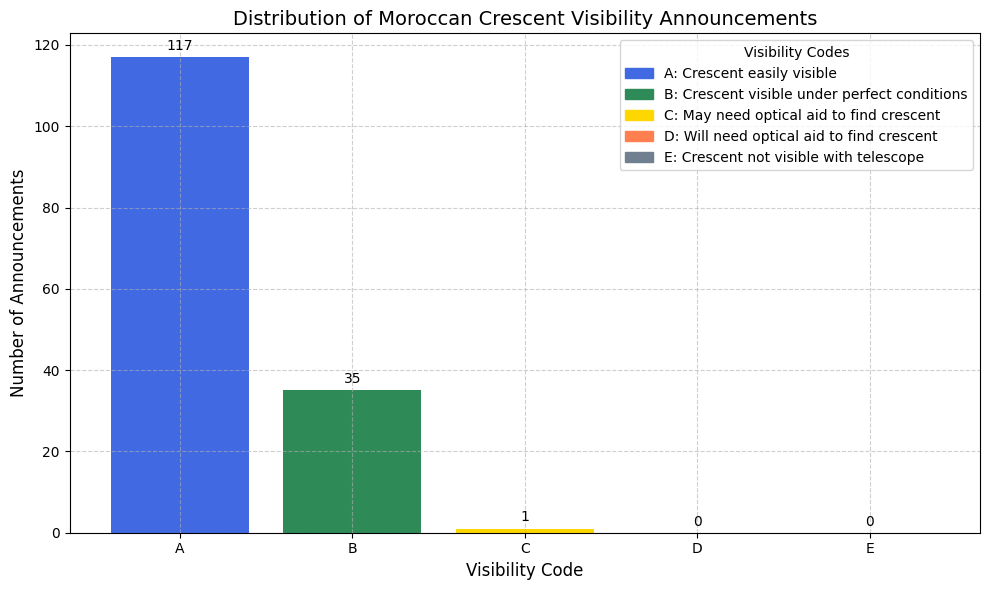

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


visibility_order = ['A', 'B', 'C', 'D', 'E']
code_counts = hilal_dataset['code'].value_counts().reindex(visibility_order).fillna(0).astype(int)

# Define the descriptions for each code
descriptions = {
    'A': 'Crescent easily visible',
    'B': 'Crescent visible under perfect conditions',
    'C': 'May need optical aid to find crescent',
    'D': 'Will need optical aid to find crescent',
    'E': 'Crescent not visible with telescope'
}

# Define colors for each code
colors = ['royalblue', 'seagreen', 'gold', 'coral', 'slategray']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(code_counts.index, code_counts.values, color=colors)

# Label axes and title
ax.set_xlabel('Visibility Code', fontsize=12)
ax.set_ylabel('Number of Announcements', fontsize=12)
ax.set_title('Distribution of Moroccan Crescent Visibility Announcements', fontsize=14)

# Annotate each bar with the count
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Customize x-tick labels to include both the code and its description
new_labels = [f"{code}" for code in code_counts.index]
ax.set_xticklabels(new_labels, fontsize=10)

# Create legend handles manually
legend_handles = [
    mpatches.Patch(color=color, label=f"{code}: {descriptions[code]}")
    for code, color in zip(visibility_order, colors)
]
ax.legend(handles=legend_handles, title='Visibility Codes', loc='upper right', fontsize=10, title_fontsize=10)

# Improve layout and show grid for a scientific look
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("crescent_visibility_distribution.png", dpi=300)  # Save as PNG with high resolution

plt.show()

# [Already done] Prepare the dataset for machine learning

In [8]:
def compute_angle(row, study_is_30=True):
    # Create a base_time using the Miladi date values from the row
    #if not row["is_30"]:
    if study_is_30:
        if row["is_30"]:
            base_time = astronomy.Time.Make(
                row['Miladi Year'],
                row['Miladi month'],
                row['Miladi day'],
                0, 0, 0
            ).AddDays(-2)
            angle = calculate(base_time=base_time, latitude=34.0084, longitude=6.8539)
        else:
            return "Ng"
    else:
        base_time = astronomy.Time.Make(
            row['Miladi Year'],
            row['Miladi month'],
            row['Miladi day'],
            0, 0, 0
        ).AddDays(-1)
        angle = calculate(base_time=base_time, latitude=34.0084, longitude=6.8539)
    
    #arcv = angle["ARCV"]
    #w_topo = angle["W_topo"]
    try:
        return angle["W_topo"]
    except KeyError:
        print(angle, base_time)
        pass



In [ ]:
# Apply the function to each row and store the result in a new column called 'Angle'
df = pd.DataFrame()
df['arcv'] = hilal_dataset.apply(compute_angle, axis=1)

In [87]:
df['W_topo'] = hilal_dataset.apply(compute_angle, axis=1)

In [39]:
df2 = pd.DataFrame()

df2['arcv'] = hilal_dataset.apply(compute_angle, axis=1)

{'q_code': 'E'} 2024-12-01T00:00:00.000Z
{'q_code': 'E'} 2014-06-27T00:00:00.000Z
{'q_code': 'E'} 2013-07-08T00:00:00.000Z


In [90]:
df2['W_topo'] = hilal_dataset.apply(compute_angle, axis=1)

{'q_code': 'E'} 2024-12-01T00:00:00.000Z
{'q_code': 'E'} 2014-06-27T00:00:00.000Z
{'q_code': 'E'} 2013-07-08T00:00:00.000Z


/var/folders/r6/45d1mmyn7s99kh71jtcrprjc0000gn/T/ipykernel_21633/3196461891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['W_topo'] = hilal_dataset.apply(compute_angle, axis=1)


In [92]:
df2 = df2[df["W_topo"] != "Ng"]

/var/folders/r6/45d1mmyn7s99kh71jtcrprjc0000gn/T/ipykernel_21633/2800737833.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df["W_topo"] != "Ng"]


In [ ]:
df2 = df2[df["W_topo"].isna["W_topo"].apply(lambda x:not x)]

In [100]:
df["output"] = [1]*len(df)

In [101]:
final_df = pd.concat([df, df2])

In [17]:
def is_30(row):
    year = row["Miladi Year"]
    month = row["Miladi month"]
    day = row["Miladi day"]
    gregorian_date = Gregorian(year, month, day)

    # Convert to Hijri date
    return gregorian_date.to_hijri().day == 2


In [18]:
hilal_dataset["is_30"] = hilal_dataset.apply(is_30, axis=1)

# Training a classifier

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ---------------------------
# 1. Load the dataset
# ---------------------------

df = hilal_dataset_final

# Features and target
X = df[['arcv', 'W_topo']]
y = df['output']

# ---------------------------
# 2. Split the dataset
# ---------------------------
# Using 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 3. Train different binary classifiers
# ---------------------------
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

cv_scores = {}

print("Cross-validation scores for each model:")
for name, model in models.items():
    # Use 3-fold cross validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores[name] = scores.mean()
    print(f"{name}: CV Accuracy = {scores.mean():.4f}")

# ---------------------------
# 4. Select the best model based on CV score
# ---------------------------
best_model_name = max(cv_scores, key=cv_scores.get)
print(f"\nBest model based on CV score: {best_model_name}")

# ---------------------------
# 5. Hyperparameter tuning for the best model
# ---------------------------
if best_model_name == 'Logistic Regression':
    model = LogisticRegression()
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    }
elif best_model_name == 'Decision Tree':
    model = DecisionTreeClassifier()
    param_grid = {
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Random Forest':
    model = RandomForestClassifier()
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'SVM':
    model = SVC(probability=True)
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    }
elif best_model_name == 'KNN':
    model = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"\nBest hyperparameters for {best_model_name}: {grid_search.best_params_}")

# ---------------------------
# 6. Evaluate the tuned model on the test set
# ---------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores for each model:
Logistic Regression: CV Accuracy = 0.9462
Decision Tree: CV Accuracy = 0.9756
Random Forest: CV Accuracy = 0.9805
SVM: CV Accuracy = 0.9413
KNN: CV Accuracy = 0.9658

Best model based on CV score: Random Forest

Best hyperparameters for Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}

Test Set Accuracy: 0.9615

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.93      0.96        29

    accuracy                           0.96        52
   macro avg       0.96      0.97      0.96        52
weighted avg       0.96      0.96      0.96        52



# Save the model

In [46]:
import pickle

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)